<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_01_adult_income_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
# Importing necessary libraries
import pandas as pd  # for tabular dataframe
import numpy as np  # for numerical computation
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline

In [188]:
# Loading The Dataset
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/adult.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/adult.csv'  # Local path



Mounted at /content/drive


In [189]:
# Let's take the dataset's pulse
data = pd.read_csv(file_path)

# Display the first row of the dataset
data.head(1)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [190]:
# Add the feature names to a list
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'class-label']

# Load the dataset again with column names
data = pd.read_csv(file_path, names=names)

In [191]:
# Display the first two rows
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [192]:
# Display the first 10 rows
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [193]:
# Display the last two rows
data.tail(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [194]:
# Print the shape of the dataset
print(f'data shape: {data.shape}')

data shape: (32561, 15)


In [195]:
data.tail(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [196]:
data.shape

(32561, 15)

In [197]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [198]:
# prompt: come up with the most common code to explore the dataset stored in data

# Display basic statistics for numerical features
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [199]:
# Display information about the DataFrame, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class-label     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [200]:
# Check for missing values in each column
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [201]:
# Explore unique values in categorical columns (example with 'education')
print(data['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [202]:
print(data['education'].value_counts())

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


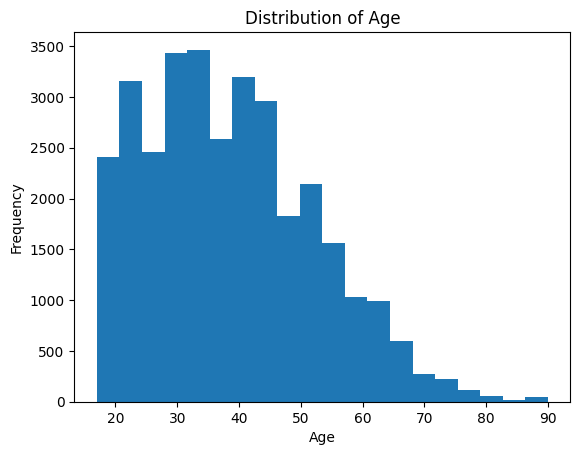

In [203]:
# Visualize the distribution of a numerical feature (example with 'age')
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [204]:
# Example of analyzing relationship between two features
pd.crosstab(data['sex'], data['class-label'])

#More examples of exploring relationships
# ... and so on ...  You can explore other features and their relationships.

class-label,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [205]:
# Sample 30,000 records from the dataset with random_state for reproducibility
data_sample = data.sample(n=30000, random_state=236)
print("Shape of sampled data:", data_sample.shape)


Shape of sampled data: (30000, 15)


In [206]:
# Generate descriptive statistics for numerical columns
data_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,38.570900,13.647038,17.0,28.0,37.0,48.00,90.0
fnlwgt,30000.0,189787.527867,105747.725172,14878.0,117789.0,178302.0,236833.25,1484705.0
education-num,30000.0,10.078600,2.570196,1.0,9.0,10.0,12.00,16.0
capital-gain,30000.0,1057.518267,7243.947257,0.0,0.0,0.0,0.00,99999.0
capital-loss,30000.0,87.343100,403.019196,0.0,0.0,0.0,0.00,4356.0
hours-per-week,30000.0,40.460600,12.362505,1.0,40.0,40.0,45.00,99.0


In [207]:
data_sample['education-num'].value_counts()

,count
education-num,
9,9647
10,6744
13,4930
14,1581
11,1276
7,1077
12,993
6,864
4,606


In [208]:
data_sample['education'].value_counts()

,count
education,
HS-grad,9647
Some-college,6744
Bachelors,4930
Masters,1581
Assoc-voc,1276
11th,1077
Assoc-acdm,993
10th,864
7th-8th,606


In [209]:
data_sample = data_sample.drop(['fnlwgt'], axis=1)
data_sample.shape

(30000, 14)

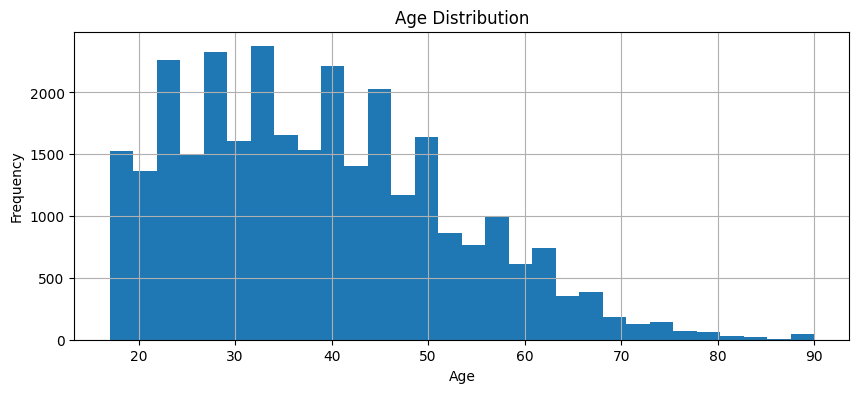

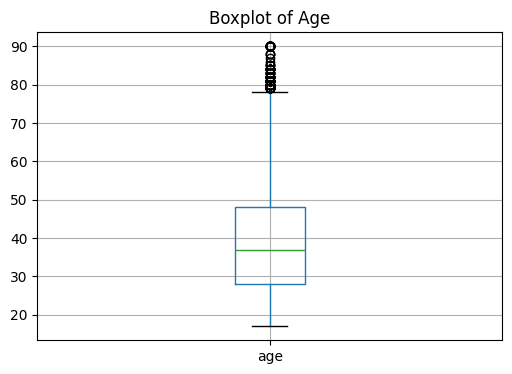

In [210]:
# Plot histogram for age distribution
plt.figure(figsize=(10, 4))
data_sample['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot for age distribution
plt.figure(figsize=(6, 4))
data_sample.boxplot(column='age')
plt.title('Boxplot of Age')
plt.show()


In [211]:
# Calculate and display mean and median age
mean_age = data_sample['age'].mean()
median_age = data_sample['age'].median()
print('Mean Age:', mean_age)
print('Median Age:', median_age)


Mean Age: 38.5709
Median Age: 37.0


In [212]:
# Count gender distribution
print("Gender distribution:")
data_sample['sex'].value_counts()


Gender distribution:


,count
sex,
Male,20043
Female,9957


In [213]:
# Count workclass distribution
print("Workclass distribution:")
data_sample['workclass'].value_counts()

Workclass distribution:


,count
workclass,
Private,20913
Self-emp-not-inc,2324
Local-gov,1926
?,1704
State-gov,1194
Self-emp-inc,1040
Federal-gov,881
Without-pay,12
Never-worked,6


In [214]:
# Average age by gender
print("Average age by gender:")
print(data_sample.groupby('sex')['age'].mean())

Average age by gender:
sex
Female    36.803254
Male      39.449035
Name: age, dtype: float64


In [215]:
# Average capital-gain by gender and occupation
print("Average capital-gain by gender and occupation:")
print(data_sample.groupby(['sex', 'occupation'])['capital-gain'].mean())

Average capital-gain by gender and occupation:
sex     occupation       
Female  ?                     351.514031
        Adm-clerical          526.860663
        Craft-repair          740.081731
        Exec-managerial      1049.506035
        Farming-fishing      1102.245902
        Handlers-cleaners     150.398649
        Machine-op-inspct     188.507128
        Other-service         162.405048
        Priv-house-serv       307.417323
        Prof-specialty       1271.026619
        Protective-serv      1808.628571
        Sales                 261.674300
        Tech-support          684.871875
        Transport-moving      489.357143
Male    ?                     515.046436
        Adm-clerical          480.487336
        Armed-Forces            0.000000
        Craft-repair          650.259102
        Exec-managerial      2741.344403
        Farming-fishing       569.663963
        Handlers-cleaners     265.136528
        Machine-op-inspct     387.144786
        Other-service    

In [216]:
# print(data_sample['sex'].unique()) # returns [' Male' ' Female']
data_sample['sex'] = data_sample['sex'].str.strip()

# Filter data by gender
data_male = data_sample[data_sample['sex'] == 'Male']
data_female = data_sample[data_sample['sex'] == 'Female']

# Compute total capital-gain by marital-status for each gender
male_capgain = data_male.groupby('marital-status')['capital-gain'].sum()
female_capgain = data_female.groupby('marital-status')['capital-gain'].sum()

print("Total capital-gain by marital-status (Male):")
male_capgain

Total capital-gain by marital-status (Male):


,capital-gain
marital-status,
Divorced,1965628
Married-AF-spouse,0
Married-civ-spouse,21193831
Married-spouse-absent,185854
Never-married,2204499
Separated,314824
Widowed,107393


In [217]:
print("\nTotal capital-gain by marital-status (Female):")
print(female_capgain)

# # Merge for side-by-side comparison
comparison = pd.concat([male_capgain, female_capgain], axis=1, keys=['Male', 'Female'])
print("\nComparison of capital-gain by marital-status:")
print(comparison)


Total capital-gain by marital-status (Female):
marital-status
Divorced                 1138186
Married-AF-spouse           2653
Married-civ-spouse       2554948
Married-spouse-absent      69174
Never-married            1388784
Separated                 218557
Widowed                   381217
Name: capital-gain, dtype: int64

Comparison of capital-gain by marital-status:
                           Male   Female
marital-status                          
Divorced                1965628  1138186
Married-AF-spouse             0     2653
Married-civ-spouse     21193831  2554948
Married-spouse-absent    185854    69174
Never-married           2204499  1388784
Separated                314824   218557
Widowed                  107393   381217


In [218]:
# Group by race and find maximum age
max_age_race = data_sample.groupby('race')['age'].max()
print("Maximum age per race:")
print(max_age_race)


Maximum age per race:
race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64


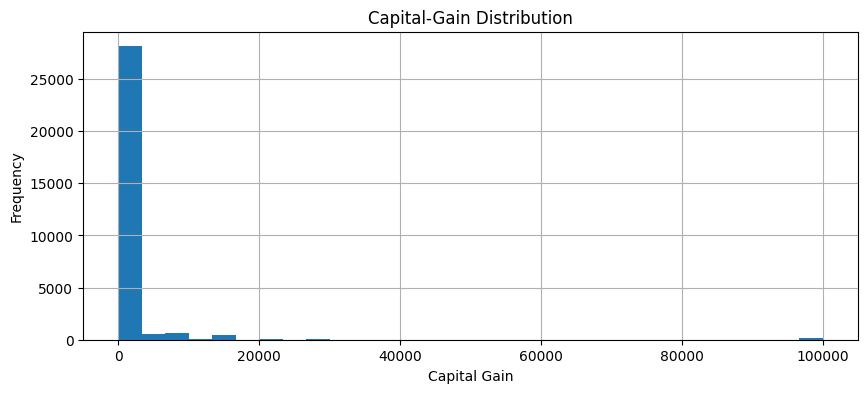

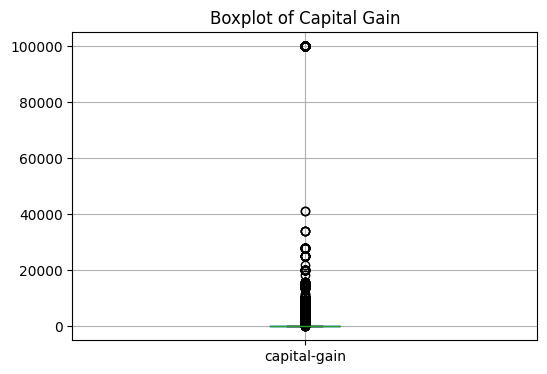

<Figure size 1200x600 with 0 Axes>

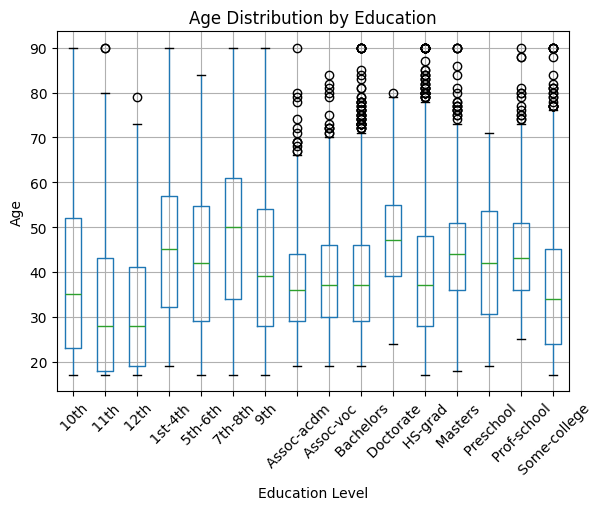

In [219]:
# Histogram for capital-gain
plt.figure(figsize=(10, 4))
data_sample['capital-gain'].hist(bins=30)
plt.title('Capital-Gain Distribution')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

# Boxplot for capital-gain
plt.figure(figsize=(6, 4))
data_sample.boxplot(column='capital-gain')
plt.title('Boxplot of Capital Gain')
plt.show()

# Boxplot of age by education
plt.figure(figsize=(12, 6))
data_sample.boxplot(column='age', by='education', rot=45)
plt.title('Age Distribution by Education')
plt.suptitle('')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.show()


In [220]:
# Check for missing values across columns
missing_values = data_sample.apply(lambda x: x.isnull().sum(), axis=0)
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class-label       0
dtype: int64


In [221]:
# Ensure native-country values have no extra spaces
data_sample['native-country'] = data_sample['native-country'].str.strip()

# Create and fit a new LabelEncoder for native-country
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
data_sample['native-country'] = le_country.fit_transform(data_sample['native-country'])

# Check the mapping (optional)
print(le_country.classes_)  # See which integer corresponds to "United-States"

# Get the encoded value for "United-States"
us_code = le_country.transform(['United-States'])[0]

# Filter for non-US records
non_us = data_sample[data_sample['native-country'] != us_code]
print(non_us.head())


['?' 'Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
 'United-States' 'Vietnam' 'Yugoslavia']
      age workclass      education  education-num  marital-status  \
6583   41   Private           11th              7        Divorced   
338    19   Private        HS-grad              9   Never-married   
6918   24   Private   Some-college             10   Never-married   
1581   31   Private      Bachelors             13   Never-married   
6175   30   Private        HS-grad              9   Never-married   

            occupation    relationship                 race     sex  \
6583   Priv-house-serv       Unmarried       

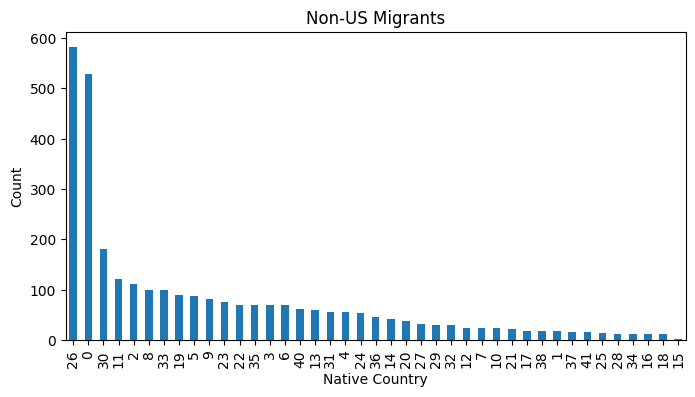

In [223]:
# Filter records for non-US migrants
# Note: Adjust the filtering if necessary after label encoding
non_us = data_sample[data_sample['native-country'] != le_country.transform(['United-States'])[0]]

# Count occurrences and plot as a bar chart
non_us_counts = non_us['native-country'].value_counts()
non_us_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Non-US Migrants')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.show()


In [227]:
# Group by occupation and gender to count occurrences
occupation_gender = data_sample.groupby(['occupation', 'sex']).size()
print("Occupation counts by gender:")
occupation_gender

# Optionally, calculate normalised value counts (ratio)
occupation_ratios = data_sample.groupby('occupation')['sex'].value_counts(normalize=True)
print("Gender ratio within occupations:")
occupation_ratios


Occupation counts by gender:
Gender ratio within occupations:


occupation         sex   
?                  Male      0.541520
                   Female    0.458480
Adm-clerical       Female    0.672764
                   Male      0.327236
Armed-Forces       Male      1.000000
Craft-repair       Male      0.944548
                   Female    0.055452
Exec-managerial    Male      0.713335
                   Female    0.286665
Farming-fishing    Male      0.933983
                   Female    0.066017
Handlers-cleaners  Male      0.881978
                   Female    0.118022
Machine-op-inspct  Male      0.730811
                   Female    0.269189
Other-service      Female    0.548451
                   Male      0.451549
Priv-house-serv    Female    0.947761
                   Male      0.052239
Prof-specialty     Male      0.633729
                   Female    0.366271
Protective-serv    Male      0.881956
                   Female    0.118044
Sales              Male      0.651596
                   Female    0.348404
Tech-support       Male      0.627474
                   Female    0.372526
Transport-moving   Male      0.942974
                   Female    0.057026
Name: proportion, dtype: float64